In [6]:
!pip install catboost

#Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score


from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, StackingClassifier



ModuleNotFoundError: No module named 'catboost'

# Importing Data

In [ ]:
df=pd.read_csv('Marketing_Leads_India.csv.gz')
pd.set_option('display.max_columns',None)

In [4]:
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Others,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Others,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Others,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
len(df.columns)

36

Checking the DataFrame

In [16]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 36 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

<AxesSubplot:title={'center':'Null Values Plot'}>

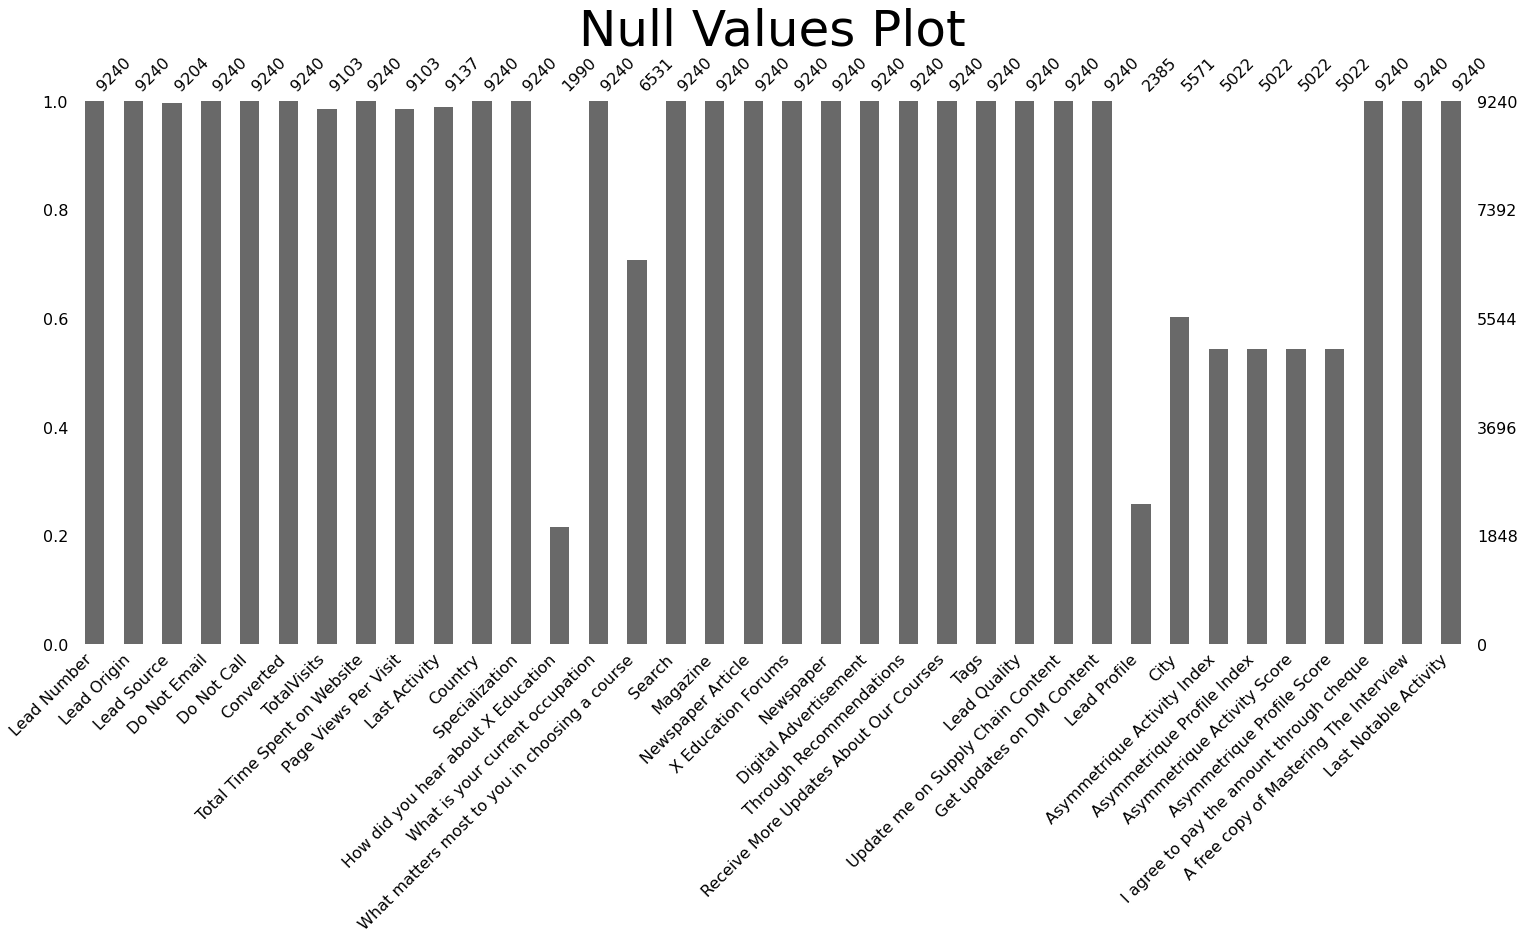

In [17]:
plt.title("Null Values Plot",fontsize=50)
ms.bar(df)

In [18]:
df.shape

(9240, 36)

Calculating percentage of null  values in data

In [19]:
round(df.isnull().sum()*100/df.shape[0],2 )  

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
How did you hear about X Education               78.46
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

Dropping the columns which have more than 70% of null values 

In [20]:
drop_col = df.loc[:,list(round(df.isnull().sum()*100/df.shape[0],2)>70.00)].columns
df=df.drop(drop_col,1)

/home/hanu/anaconda3/envs/nlp_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [21]:
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [22]:
df.shape

(9240, 34)

## `Exploratory Data Analysis`

In [23]:
#Calculating the percentage of unique values present in a column
for col in df.select_dtypes(include = 'object').columns:
  print(col)
  print("********************************************************************\n")
  print(df[col].value_counts(normalize=True)*100)
  print("********************************************************************\n")

Lead Origin
********************************************************************

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64
********************************************************************

Lead Source
********************************************************************

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010865
welearnblog_Home    

# Data Preparation

In [24]:
#Finding list of columns which have categorical values (Yes/No)
discrete_col = []
for col in  df:
  if 'Yes' in df[col].unique() or 'No' in df[col].unique():
    discrete_col.append(col)
discrete_col

/home/hanu/anaconda3/envs/nlp_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


['Do Not Email',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview']

Replacing the Yes to 1 and No to 0

In [25]:
for feature in discrete_col:
  df[feature].replace(('Yes','No'),(1,0),inplace = True)
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


**Handling the missing values**

A COMMON WAY TO REPLACE EMPTY CELLS, IS TO CALCULATE THE MEAN,MEDIAN OR MODE VALUE OF THE COLUMN.A COMMON WAY TO REPLACE EMPTY CELLS, IS TO CALCULATE THE MEAN,MEDIAN OR MODE VALUE OF THE COLUMN

Here, we would replace the value that appears most frequently.(**MODE**)

In [26]:
null_col = ['Lead Quality','City','Specialization','Tags','What matters most to you in choosing a course','What is your current occupation','Country']
for col in null_col:
  x= df[col].mode()[0]
  df[col].fillna(x, inplace = True)

In [27]:
#Finding the percentage of null values present in each column
round(df.isnull().sum()*100/df.shape[0],2 )

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

Plotting null Values

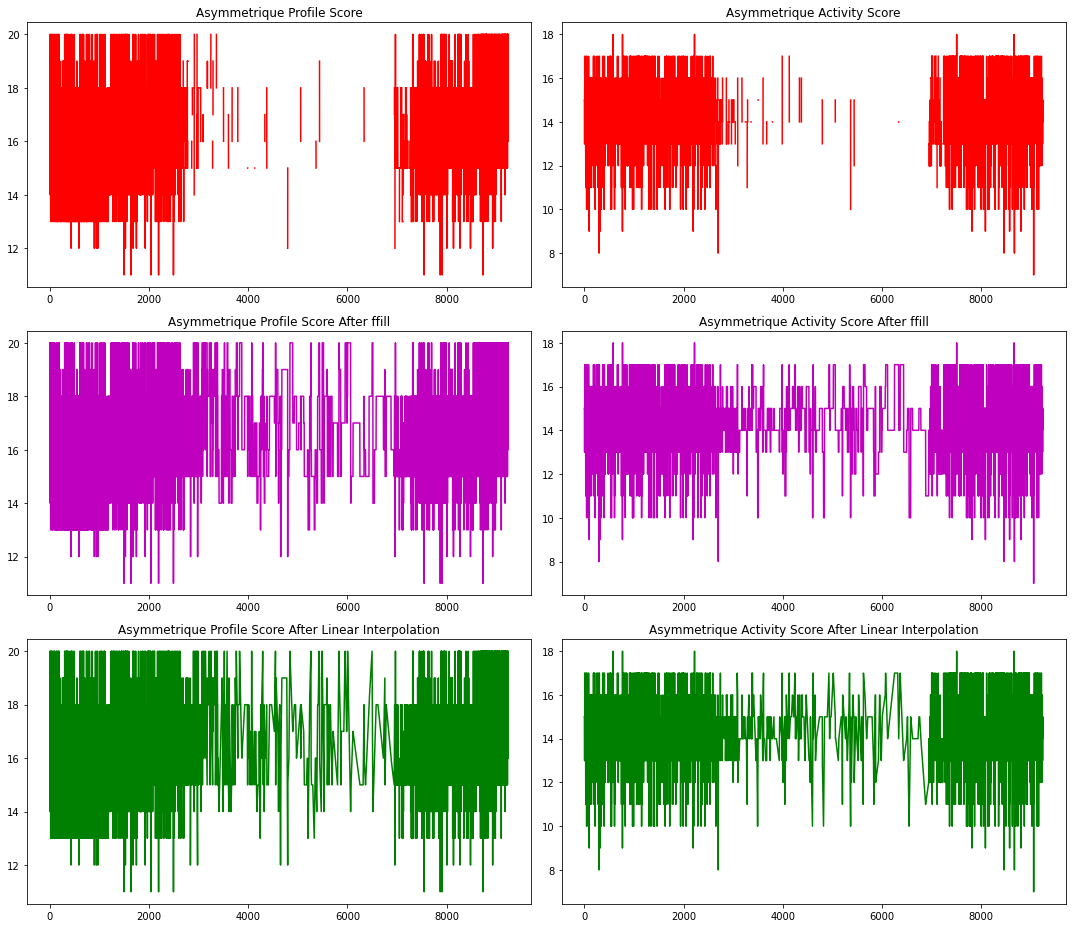

In [28]:
plt.figure(figsize=(15,13))
plt.subplot(321)
plt.title("Asymmetrique Profile Score")
plt.plot(df['Asymmetrique Profile Score'],color='r')
plt.subplot(322)
plt.title("Asymmetrique Activity Score")
plt.plot(df['Asymmetrique Activity Score'],color='r')
plt.subplot(323)
plt.title("Asymmetrique Profile Score After ffill")
plt.plot(df['Asymmetrique Profile Score'].fillna(method = 'ffill'),color='m')
plt.subplot(324)
plt.title("Asymmetrique Activity Score After ffill")
plt.plot(df['Asymmetrique Activity Score'].fillna(method = 'ffill'),color='m')
plt.subplot(325)
plt.title("Asymmetrique Profile Score After Linear Interpolation")
plt.plot(df['Asymmetrique Profile Score'].interpolate(),color='g')
plt.subplot(326)
plt.title("Asymmetrique Activity Score After Linear Interpolation")
plt.plot(df['Asymmetrique Activity Score'].interpolate(),color='g')
plt.tight_layout()

Here, 'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score' have large percentage of null values. So we should drop these columns.

In [29]:
df = df.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],1)

/home/hanu/anaconda3/envs/nlp_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


Now the remaining columns have less than 2% null values. So we can drop these rows directly.

In [30]:
df.dropna(inplace = True)
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Mumbai,0,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,0,Modified


We can do further analysis with good representation of both the classes.

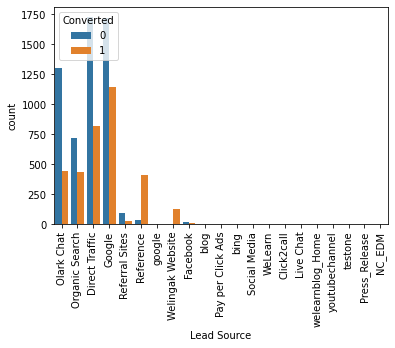

In [31]:
sns.countplot(data=df,x='Lead Source',hue='Converted')
plt.xticks(rotation=90)
plt.show()

We can see there are many values which are looking negligible with compare to other values.So, we should remove them.

In [32]:
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [33]:
df['Lead Source'] = df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other_Lead_Source')
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Mumbai,0,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,0,Modified


In [34]:
#google and Google are same but are represented as different columns.
#So we should replace all occurrences of one column into another column.
df['Lead Source'] = df['Lead Source'].replace('google','Google')

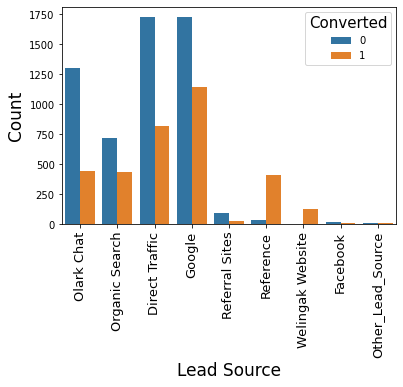

In [35]:
#Representation of Lead Source when unwanted values are removed

sns.countplot(data=df,x='Lead Source',hue='Converted')
plt.xticks(fontsize=13,rotation=90)

plt.xlabel("Lead Source",fontsize=17)
plt.ylabel("Count", fontsize=17)
plt.legend(fontsize=10, title_fontsize='15',title='Converted')
plt.show()

The lead count are maximum in Direct Traffic and Google.
Conversion rate is maximum in Reference and Welingak Website.

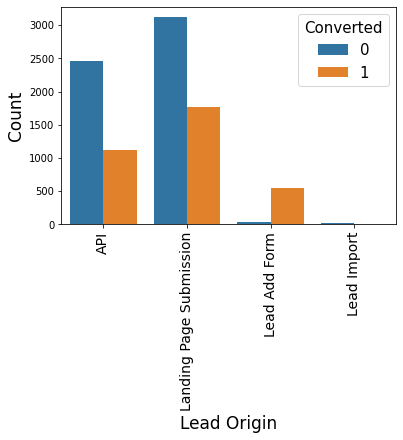

In [36]:
sns.countplot(data=df,x='Lead Origin',hue='Converted')
plt.xticks(fontsize=14,rotation=90)
plt.xlabel("Lead Origin",fontsize=17)
plt.ylabel("Count", fontsize=17)
plt.legend(fontsize=15, title_fontsize='15',title='Converted')
plt.show()

API and Landing Page Submission have almost 35% conversion rate and Lead Add Form has a high conversion rate. And Lead import has a very low lead count and conversion rate.


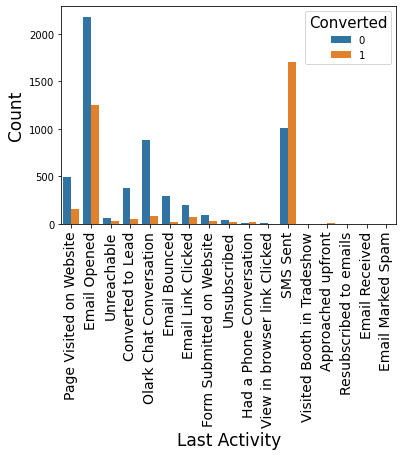

In [37]:
sns.countplot(data=df,x='Last Activity',hue='Converted')
plt.xticks(fontsize=14,rotation=90)
plt.xlabel("Last Activity",fontsize=17)
plt.ylabel("Count", fontsize=17)
plt.legend(fontsize=10, title_fontsize='15',title='Converted',loc='upper right')
plt.show()

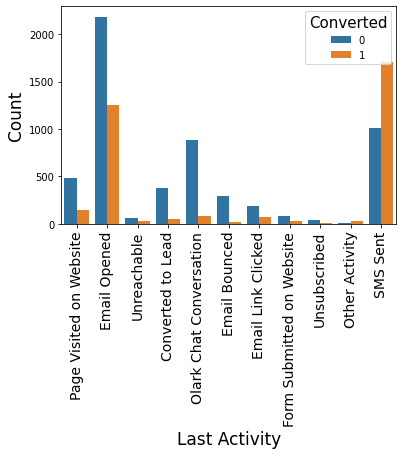

In [38]:
# Converting all the low count categories to the 'Others' category
df['Last Activity'] = df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other Activity')

# lets plot the Last Activity again 
sns.countplot(data=df,x='Last Activity',hue='Converted')
plt.xticks(fontsize=14,rotation=90)
plt.xlabel("Last Activity",fontsize=17)
plt.ylabel("Count", fontsize=17)
plt.legend(fontsize=10, title_fontsize='15',title='Converted',loc='upper right')
plt.show()

The counts of Email opened as Last Activity and the conversion rate of SMS sent is maximum.


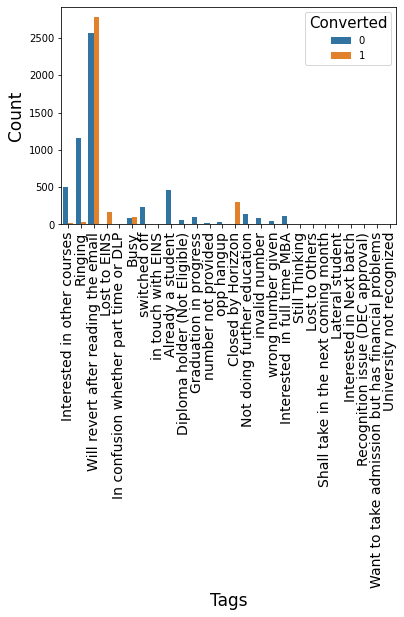

In [39]:
sns.countplot(data=df,x='Tags',hue='Converted')
plt.xticks(fontsize=14,rotation=90)
plt.xlabel("Tags",fontsize=17)
plt.ylabel("Count", fontsize=17)
plt.legend(fontsize=10, title_fontsize='15',title='Converted',loc='upper right')
plt.show()

We should convert the tags which have very less count as Other_Tags

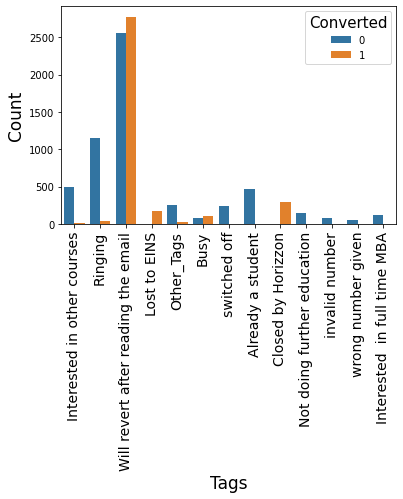

In [40]:
df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')
sns.countplot(data=df,x='Tags',hue='Converted')
plt.xticks(fontsize=14,rotation=90)
plt.xlabel("Tags",fontsize=17)
plt.ylabel("Count", fontsize=17)
plt.legend(fontsize=10, title_fontsize='15',title='Converted',loc='upper right')
plt.show()

Will revert after reading the email has very high count and conversion rate. And Closed by horizon also has high conversion rate.

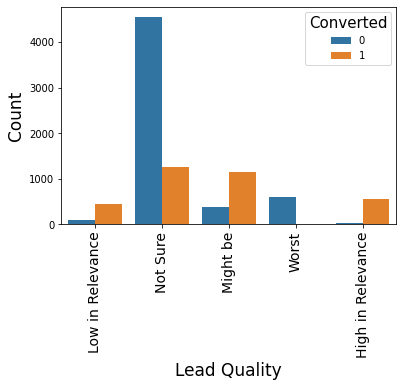

In [41]:
sns.countplot(data=df,x='Lead Quality',hue='Converted')
plt.xticks(fontsize=14,rotation=90)
plt.xlabel("Lead Quality",fontsize=17)
plt.ylabel("Count", fontsize=17)
plt.legend(fontsize=10, title_fontsize='15',title='Converted',loc='upper right')
plt.show()

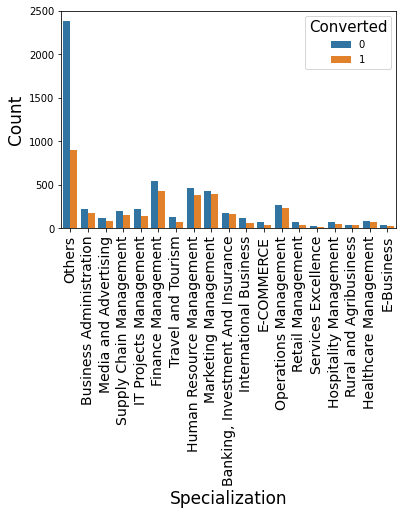

In [42]:
sns.countplot(data=df,x='Specialization',hue='Converted')
plt.xticks(fontsize=14,rotation=90)
plt.xlabel("Specialization",fontsize=17)
plt.ylabel("Count", fontsize=17)
plt.legend(fontsize=10, title_fontsize='15',title='Converted',loc='upper right')
plt.show()

Visualizing the plot of Specialization, no specific inference can be made for it.

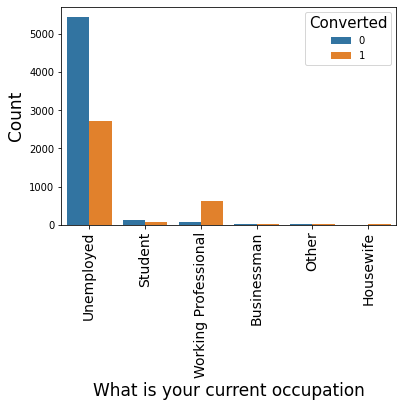

In [43]:
sns.countplot(data=df,x='What is your current occupation',hue='Converted')
plt.xticks(fontsize=14,rotation=90)
plt.xlabel("What is your current occupation",fontsize=17)
plt.ylabel("Count", fontsize=17)
plt.legend(fontsize=10, title_fontsize='15',title='Converted',loc='upper right')
plt.show()

Visualizing the graph, Working Professional has a high conversion rate. And Unemployed has a huge lead count.

In [44]:
  df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [45]:
# Dropping unnecessary columns which have only single unique values and they don't have any impact on target variable
df = df.drop(df.columns[[0,4,10,13,14,15,16,17,18,19,20,21,24,25,27,28]],axis=1)
df.head

<bound method NDFrame.head of                   Lead Origin     Lead Source  Do Not Email  Converted  \
0                         API      Olark Chat             0          0   
1                         API  Organic Search             0          0   
2     Landing Page Submission  Direct Traffic             0          1   
3     Landing Page Submission  Direct Traffic             0          0   
4     Landing Page Submission          Google             0          1   
...                       ...             ...           ...        ...   
9235  Landing Page Submission  Direct Traffic             1          1   
9236  Landing Page Submission  Direct Traffic             0          0   
9237  Landing Page Submission  Direct Traffic             1          0   
9238  Landing Page Submission          Google             0          1   
9239  Landing Page Submission  Direct Traffic             0          1   

      TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0        

In [46]:
cat_col = df.dtypes[~(df.dtypes == 'int64') & ~(df.dtypes == 'float64')].keys()
cat_col

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'Lead Quality', 'City',
       'Last Notable Activity'],
      dtype='object')

In [47]:
# get dummy variables of categorical columns to convert the string into integer
dummy = pd.get_dummies(df[cat_col],drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [48]:
df = df.drop(cat_col,axis=1)
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,0,0.0,0,0.0
1,0,0,5.0,674,2.5
2,0,1,2.0,1532,2.0
3,0,0,1.0,305,1.0
4,0,1,2.0,1428,1.0


In [49]:
df = pd.concat([df,dummy],axis=1)
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [50]:
# Separating target variable and input variables 
x = df.drop('Converted',axis=1)
y = df['Converted']
x.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [51]:
#Split the data into train and test
x_train, x_test, y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=42)

In [52]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(7259, 84) (7259,) (1815, 84) (1815,)


## Feature Scaling

In [53]:
scaler=StandardScaler()
x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

x_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1297,0,0.521114,-0.775005,1.677588,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6052,0,-0.705066,-0.890339,-1.090263,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6587,0,-0.091976,-0.491245,0.293663,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4397,0,0.521114,0.693221,1.677588,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5380,1,-0.296339,-0.820772,-0.167646,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


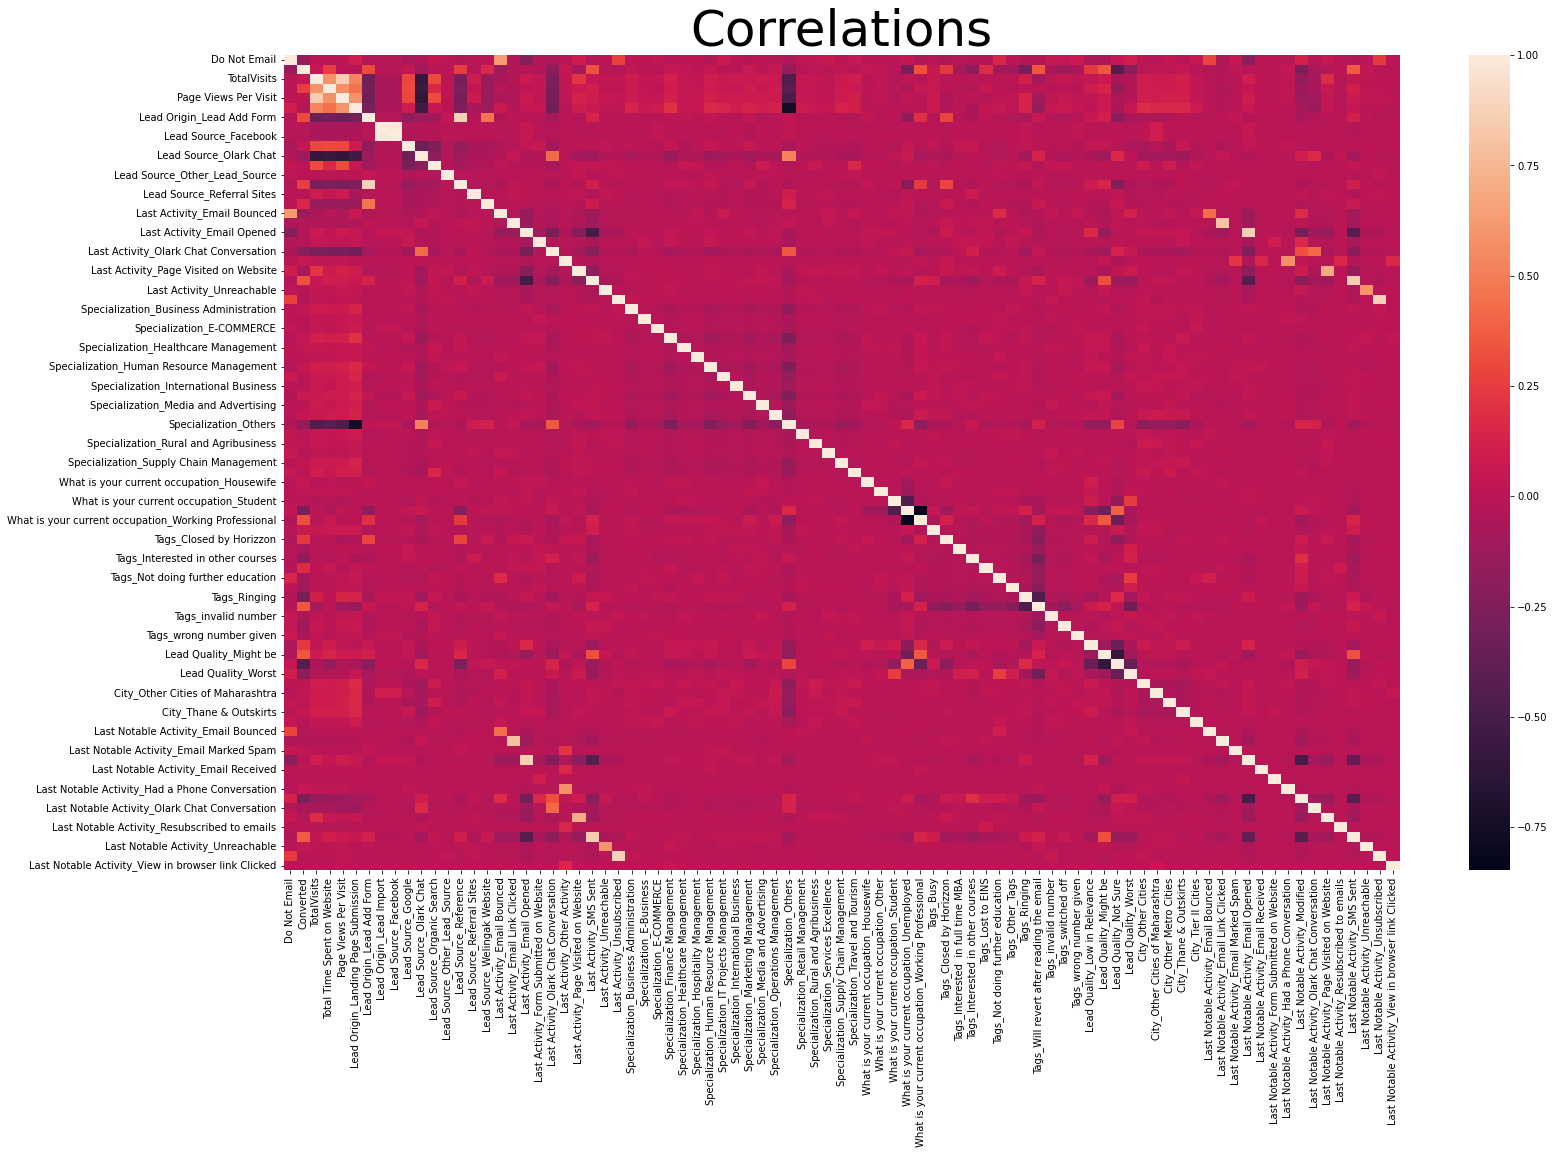

In [54]:
# setting the figure size

plt.figure(figsize=(25,15))

# setting the title

plt.title('Correlations',fontsize=50)

# Plotting a heatmap

sns.heatmap(df.corr(method='spearman'))

plt.show()

In [55]:
cor_matrix = df.corr().abs()
print(cor_matrix)

                                                    Do Not Email  Converted  \
Do Not Email                                            1.000000   0.140786   
Converted                                               0.140786   1.000000   
TotalVisits                                             0.035715   0.032855   
Total Time Spent on Website                             0.046192   0.359261   
Page Views Per Visit                                    0.036403   0.000260   
...                                                          ...        ...   
Last Notable Activity_Resubscribed to emails            0.003073   0.013451   
Last Notable Activity_SMS Sent                          0.029608   0.360233   
Last Notable Activity_Unreachable                       0.010516   0.037893   
Last Notable Activity_Unsubscribed                      0.241202   0.016286   
Last Notable Activity_View in browser link Clicked      0.003073   0.008194   

                                                   

In [56]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                                                    Do Not Email  Converted  \
Do Not Email                                                 NaN   0.140786   
Converted                                                    NaN        NaN   
TotalVisits                                                  NaN        NaN   
Total Time Spent on Website                                  NaN        NaN   
Page Views Per Visit                                         NaN        NaN   
...                                                          ...        ...   
Last Notable Activity_Resubscribed to emails                 NaN        NaN   
Last Notable Activity_SMS Sent                               NaN        NaN   
Last Notable Activity_Unreachable                            NaN        NaN   
Last Notable Activity_Unsubscribed                           NaN        NaN   
Last Notable Activity_View in browser link Clicked           NaN        NaN   

                                                   

/home/hanu/anaconda3/envs/nlp_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [57]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]
print(); print(to_drop)


['Lead Source_Facebook', 'Lead Source_Reference', 'Last Notable Activity_Email Opened', 'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unsubscribed']


In [58]:
x_train = x_train.drop(to_drop, axis=1)
x_test = x_test.drop(to_drop, axis=1)
print(x_train.shape,x_test.shape)

(7259, 79) (1815, 79)


In [59]:
ct = ColumnTransformer([('se', StandardScaler(), ['Total Time Spent on Website', 'Page Views Per Visit', 'TotalVisits'])], remainder='passthrough')


In [60]:
random_forest_pipeline = Pipeline([('transformer', ct), ('RandomForest', RandomForestClassifier(random_state = 42))])
adaboost_pipeline = Pipeline([('transformer', ct), ('Adaboost', AdaBoostClassifier(random_state = 42))])
ExtraTree_pipeline = Pipeline([('transformer', ct), ('ExtraTreeClassifier', ExtraTreesClassifier(random_state = 42))])
BaggingClassifier_pipeline = Pipeline([('transformer', ct), ('BaggingClassifier', BaggingClassifier(base_estimator = DecisionTreeClassifier(), random_state = 42))])
GradientBoost_pipeline = Pipeline([('transformer', ct), ('GradientBoosting', GradientBoostingClassifier(random_state = 42))])
dtree_pipeline = Pipeline([('transformer', ct), ('DecisionTree', DecisionTreeClassifier(random_state = 42))])
knn_pipeline = Pipeline([('transformer', ct), ('KNN', KNeighborsClassifier())])
lr_pipeline = Pipeline([('transformer', ct), ('LogisticRegression', LogisticRegression(random_state = 42,solver='lbfgs', max_iter=100))])
sgd_pipeline = Pipeline([('transformer', ct), ('StochasticGradient', SGDClassifier(random_state = 42))])
mlp_pipeline = Pipeline([('transformer', ct), ('MLPClassifier', MLPClassifier(random_state = 42))])
naive_pipeline = Pipeline([('transformer', ct), ('NaiveBayes', GaussianNB())])
svc_pipeline = Pipeline([('transformer', ct), ('SVM', SVC(random_state = 42))])
lightgbm_pipeline = Pipeline([('transformer', ct), ('lightgbm', LGBMClassifier(random_state = 42))])
catboost_pipeline = Pipeline([('transformer', ct), ('CatBoost', CatBoostClassifier(random_state = 42, silent = True))])
xgboost_pipeline = Pipeline([('transformer', ct), ('XGBoost', XGBClassifier(random_state = 42))])

In [61]:
pipeline_list = [random_forest_pipeline, adaboost_pipeline, ExtraTree_pipeline, BaggingClassifier_pipeline, GradientBoost_pipeline,
                dtree_pipeline, knn_pipeline, lr_pipeline, sgd_pipeline, mlp_pipeline, naive_pipeline, svc_pipeline,
                lightgbm_pipeline, catboost_pipeline, xgboost_pipeline]

In [62]:
pipe_dict = {0: "RandomForest", 1: "Adaboost", 2: "ExtraTree", 3: "BaggingClassifier", 4: "GradientBoosting", 5: "DecisionTree",
            6: "KNN", 7: "Logistic", 8: "SGD Classifier", 9: "MLPClassifier", 10: "NaiveBayes",
            11: "SVM", 12: "LightGBM", 13: "Catboost", 14: "XGBoost"}

In [63]:
for idx, pipe in enumerate(pipeline_list):
    score = cross_val_score(pipe, x_train, y_train, cv = 10, scoring = 'accuracy')
    print(pipe_dict[idx], ":", score.mean())

RandomForest : 0.9239555428897122
Adaboost : 0.9115569487983282
ExtraTree : 0.9207878787878789
BaggingClassifier : 0.9163799753016054
GradientBoosting : 0.9276766410183338
DecisionTree : 0.8980560463569868
KNN : 0.8868994015388999


/home/hanu/anaconda3/envs/nlp_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/hanu/anaconda3/envs/nlp_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/

Logistic : 0.9166556473829202
SGD Classifier : 0.9086659067160635


/home/hanu/anaconda3/envs/nlp_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/hanu/anaconda3/envs/nlp_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/hanu/anaconda3/envs/nlp_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/hanu/anaconda3/envs/nlp_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet

MLPClassifier : 0.9176198347107437
NaiveBayes : 0.8300079794813339
SVM : 0.9247835090719103
LightGBM : 0.9262992305500143
Catboost : 0.9271251068680535
[22:27:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/hanu/anaconda3/envs/nlp_env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/hanu/anaconda3/envs/nlp_env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:27:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/hanu/anaconda3/envs/nlp_env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:27:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/hanu/anaconda3/envs/nlp_env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:27:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/hanu/anaconda3/envs/nlp_env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:27:29] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/hanu/anaconda3/envs/nlp_env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:27:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/hanu/anaconda3/envs/nlp_env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:27:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/hanu/anaconda3/envs/nlp_env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:27:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/hanu/anaconda3/envs/nlp_env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:27:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/hanu/anaconda3/envs/nlp_env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:27:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost : 0.9220279281846679


We will choose top 5 algorithms on the basis of these cross-validation scores.
XGBoost : 0.9283
GradientBoosting : 0.9276
Catboost : 0.9271
LightGBM : 0.9260
SVM : 0.9247

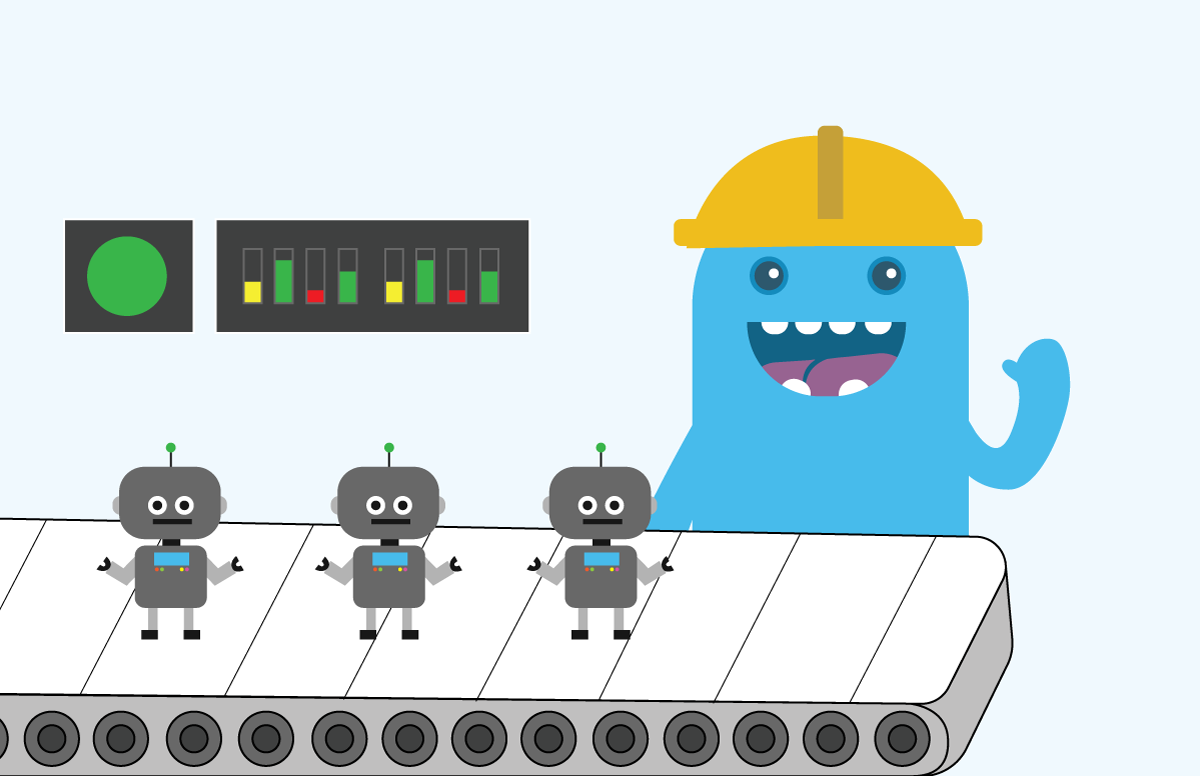

# XGBoost Classifier

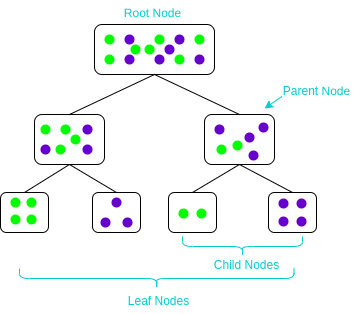

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Kubernetes, Hadoop, SGE, MPI, Dask) and can solve problems beyond billions of examples.

In [64]:
xgb=XGBClassifier(random_state=42)

In [65]:
model = xgb.fit(x_train, y_train)
predict_train_y = model.predict(x_train)
predict_test_y = model.predict(x_test)
xgb_test_score = metrics.accuracy_score(predict_test_y,y_test)
xgb_train_score = metrics.accuracy_score(predict_train_y,y_train)
print("Testing Accuracy : ", xgb_test_score)
print("Training Accuracy : ", xgb_train_score)

/home/hanu/anaconda3/envs/nlp_env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:30:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Testing Accuracy :  0.8369146005509642
Training Accuracy :  0.9696927951508473


In [66]:
test_cf_report = pd.DataFrame(classification_report(y_test, predict_test_y, output_dict = True))
print(test_cf_report)

                     0           1  accuracy    macro avg  weighted avg
precision     0.926002    0.733967  0.836915     0.829984      0.852997
recall        0.800889    0.895652  0.836915     0.848271      0.836915
f1-score      0.858913    0.806789  0.836915     0.832851      0.839097
support    1125.000000  690.000000  0.836915  1815.000000   1815.000000


Text(91.68, 0.5, 'Predicted Value')

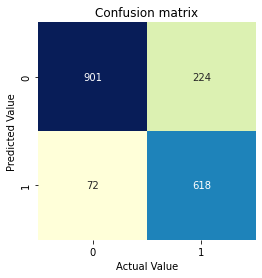

In [67]:
test_conf = confusion_matrix(y_test, predict_test_y)
sns.heatmap(test_conf, square=True, annot=True, cmap='YlGnBu', fmt='g', cbar=False)
plt.title('Confusion matrix')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

# Gradient Boosting Classifier

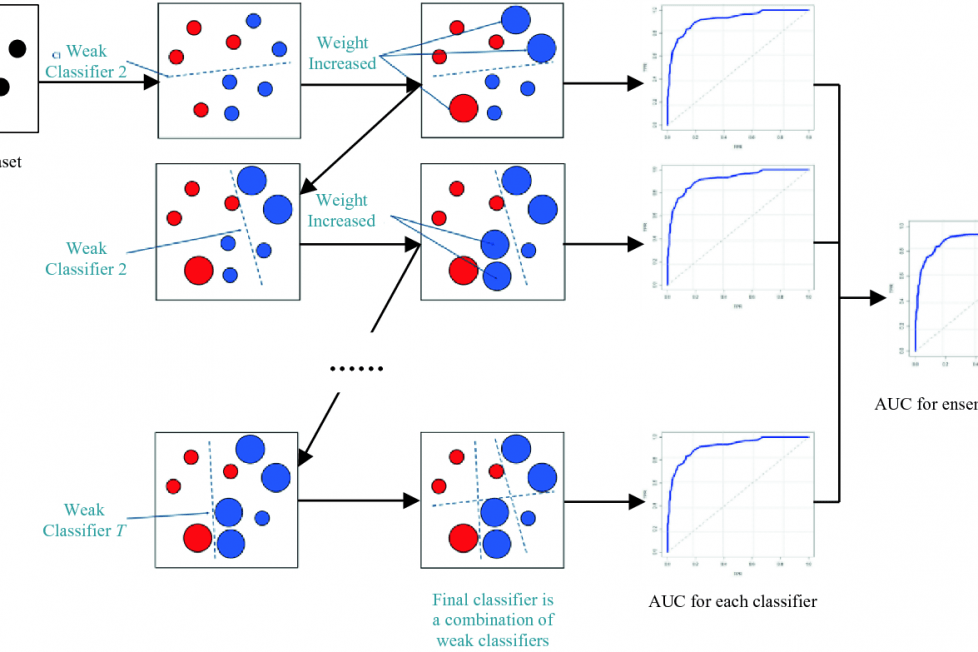

The gradient is used to minimize the loss function (error - difference between the actual values and predicted values). It is basically the partial derivative of the loss function, so it describes the steepness of our error function. 

In [68]:
gB=GradientBoostingClassifier(random_state=42)

In [104]:
model1 = gB.fit(x_train, y_train)
predict_train_y = model1.predict(x_train)
predict_test_y = model1.predict(x_test)
gradientBoost_test_score = metrics.accuracy_score(predict_test_y,y_test)
gradientBoost_train_score = metrics.accuracy_score(predict_train_y,y_train)
print("Testing Accuracy : ", gradientBoost_test_score)
print("Training Accuracy : ", gradientBoost_train_score)

Testing Accuracy :  0.9140495867768595
Training Accuracy :  0.9324975891996142


In [105]:
test_gb_report = pd.DataFrame(classification_report(y_test, predict_test_y, output_dict = True))
print(test_gb_report)

                     0           1  accuracy    macro avg  weighted avg
precision     0.910246    0.921136   0.91405     0.915691      0.914386
recall        0.955556    0.846377   0.91405     0.900966      0.914050
f1-score      0.932350    0.882175   0.91405     0.907263      0.913276
support    1125.000000  690.000000   0.91405  1815.000000   1815.000000


Text(91.68, 0.5, 'Predicted Value')

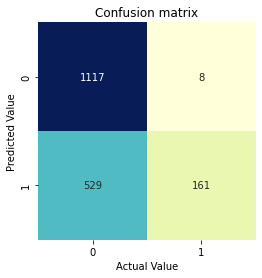

In [90]:
test_conf = confusion_matrix(y_test, predict_test_y)
sns.heatmap(test_conf, square=True, annot=True, cmap='YlGnBu', fmt='g', cbar=False)
plt.title('Confusion matrix')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

# Catboost Classifier

CatBoost is a fast, scalable, high performance gradient boosting on decision trees library. Used for ranking, classification, regression and other ML tasks.

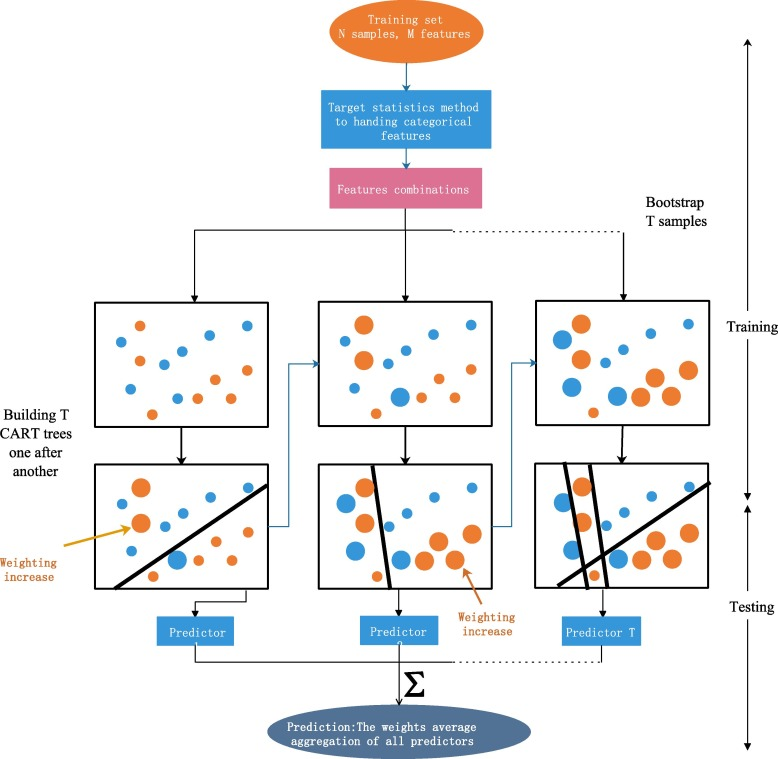

In [91]:
catboost_classif = CatBoostClassifier(random_state=42, silent = True)
model = catboost_classif.fit(x_train, y_train)
predict_train_y = model.predict(x_train)
predict_test_y = model.predict(x_test)
catBoost_test_score = metrics.accuracy_score(predict_test_y,y_test)
catBoost_train_score = metrics.accuracy_score(predict_train_y,y_train)
print("Testing Accuracy : ", catBoost_test_score)
print("Training Accuracy : ", catBoost_train_score)

Testing Accuracy :  0.8231404958677686
Training Accuracy :  0.9498553519768563


In [92]:
test_cB_report = pd.DataFrame(classification_report(y_test, predict_test_y, output_dict = True))
print("Classification Report : ")
print(test_cB_report)

Classification Report : 
                     0           1  accuracy    macro avg  weighted avg
precision     0.950673    0.699892   0.82314     0.825282      0.855334
recall        0.753778    0.936232   0.82314     0.845005      0.823140
f1-score      0.840853    0.800992   0.82314     0.820922      0.825699
support    1125.000000  690.000000   0.82314  1815.000000   1815.000000


Text(91.68, 0.5, 'Predicted Value')

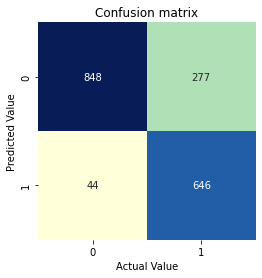

In [93]:
test_conf = confusion_matrix(y_test, predict_test_y)
sns.heatmap(test_conf, square=True, annot=True, cmap='YlGnBu', fmt='g', cbar=False)
plt.title('Confusion matrix')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

# LGBM Classifier

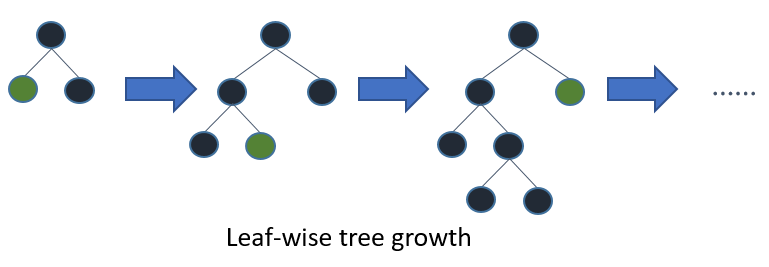

Light Gradient Boosting Machine is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:

Faster training speed and higher efficiency.
Lower memory usage.
Better accuracy.
Support of parallel, distributed, and GPU learning.
Capable of handling large-scale data.

In [103]:
lgbm = LGBMClassifier(random_state=42)
model2 = lgbm.fit(x_train, y_train)
predict_train_y = model.predict(x_train)
predict_test_y = model.predict(x_test)
lgbm_test_score = metrics.accuracy_score(predict_test_y,y_test)
lgbm_train_score = metrics.accuracy_score(predict_train_y,y_train)
print("Testing Accuracy : ", lgbm_test_score)
print("Training Accuracy : ", lgbm_train_score)

Testing Accuracy :  0.7041322314049587
Training Accuracy :  0.9360793497726959


In [95]:
test_lgbm_report = pd.DataFrame(classification_report(y_test, predict_test_y, output_dict = True))
print("Classification Report :")
print(test_lgbm_report)

Classification Report :
                     0           1  accuracy    macro avg  weighted avg
precision     0.944386    0.738979  0.846832     0.841683      0.866298
recall        0.800000    0.923188  0.846832     0.861594      0.846832
f1-score      0.866218    0.820876  0.846832     0.843547      0.848980
support    1125.000000  690.000000  0.846832  1815.000000   1815.000000


Text(91.68, 0.5, 'Predicted Value')

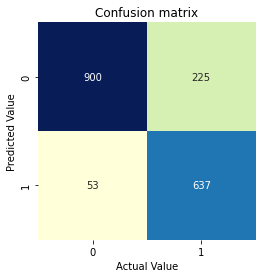

In [96]:
test_conf = confusion_matrix(y_test, predict_test_y)
sns.heatmap(test_conf, square=True, annot=True, cmap='YlGnBu', fmt='g', cbar=False)
plt.title('Confusion matrix')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

# Support Vector Machine

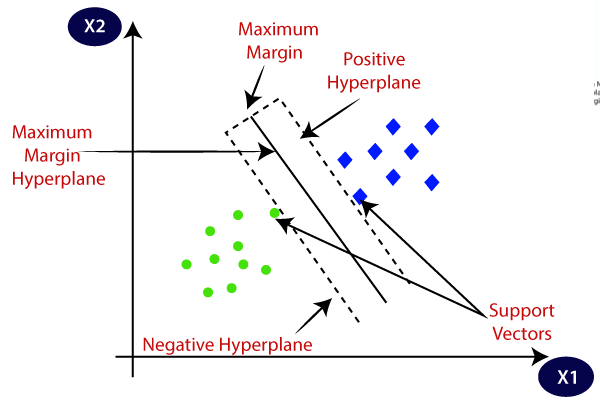

Support Vector Machine(SVM) is a supervised machine learning algorithm used for both classification and regression. Though we say regression problems as well its best suited for classification. The objective of SVM algorithm is to find a hyperplane in an N-dimensional space that distinctly classifies the data points.

In [97]:
svm_classifier = SVC(random_state=42)

In [98]:
model = svm_classifier.fit(x_train, y_train)
predict_train_y = model.predict(x_train)
predict_test_y = model.predict(x_test)
svm_classifier_test_score = metrics.accuracy_score(predict_test_y,y_test)
svm_classifier_train_score = metrics.accuracy_score(predict_train_y,y_train)
print("Testing Accuracy : ", svm_classifier_test_score)
print("Training Accuracy : ", svm_classifier_train_score)

Testing Accuracy :  0.7041322314049587
Training Accuracy :  0.9360793497726959


In [99]:
test_svm_classifier_report = pd.DataFrame(classification_report(y_test, predict_test_y, output_dict = True))
print(test_svm_classifier_report)

                     0           1  accuracy    macro avg  weighted avg
precision     0.678615    0.952663  0.704132     0.815639      0.782798
recall        0.992889    0.233333  0.704132     0.613111      0.704132
f1-score      0.806207    0.374854  0.704132     0.590531      0.642222
support    1125.000000  690.000000  0.704132  1815.000000   1815.000000


Text(91.68, 0.5, 'Predicted Value')

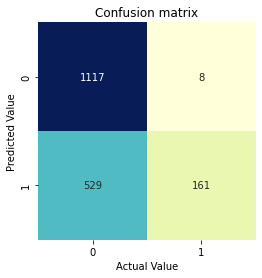

In [100]:
test_conf = confusion_matrix(y_test, predict_test_y)
sns.heatmap(test_conf, square=True, annot=True, cmap='YlGnBu', fmt='g', cbar=False)
plt.title('Confusion matrix')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

In [101]:
acc_score=pd.DataFrame(columns=["model", "train_accuracy","test_accuracy"])
acc_score

,model,train_accuracy,test_accuracy


In [106]:
acc_score["model"]=["LGBM Classifier","CatBoost Classifier","XG Boost Classifier", "Gradient Boosting Classifier","SVM Classifier"]
acc_score["train_accuracy"]=[lgbm_train_score,catBoost_train_score,xgb_train_score,gradientBoost_train_score , svm_classifier_train_score]
acc_score["test_accuracy"]=[lgbm_test_score,catBoost_test_score,xgb_test_score,gradientBoost_test_score , svm_classifier_test_score]
acc_score

,model,train_accuracy,test_accuracy
0,LGBM Classifier,0.936079,0.704132
1,CatBoost Classifier,0.949855,0.823140
2,XG Boost Classifier,0.969693,0.836915
3,Gradient Boosting Classifier,0.932498,0.914050
4,SVM Classifier,0.936079,0.704132


From the above dataframe, we can see Gradient Boosting Classifier is performing much better than other models. 

In [107]:
import pickle

In [108]:
pickle.dump(model1,open("model.pkl",'wb'))